# Laboratorio #7 
## Jhoan Londoño Restrepo
Curso de aprendizaje estadístico 2022-1

In [1]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

# Función de activación

Lo primero que haremos para crear un modelo de red neuronal será construir las 2 funciones más utilizadas para problemas de clasificación estan serán:

## Función Relu:

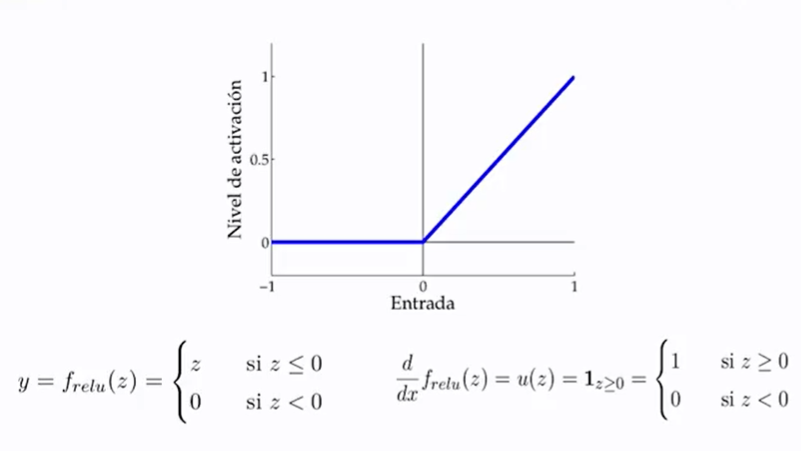

## Función Sigmoid

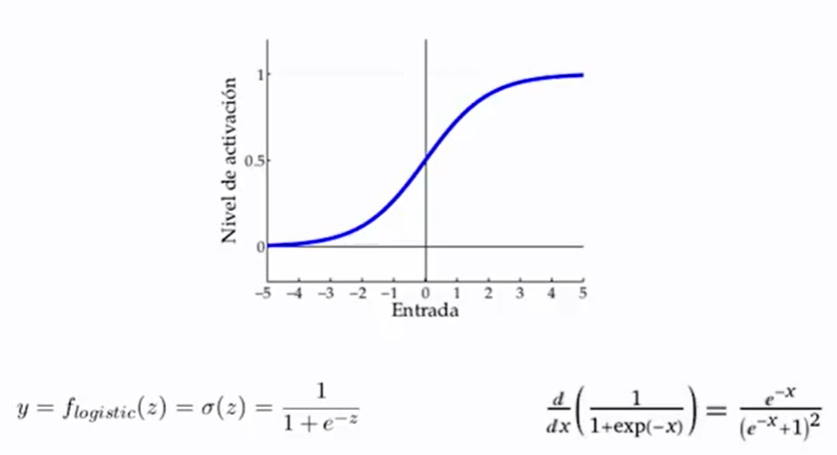

In [4]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

# Función de coste

Para la función de coste usaremos el error cuadrático medio:

##$$
\mathrm{MSE}=\frac{1}{N} \sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2
$$

In [5]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)
    

# Estructura de la red neuronal
##Función de inicialización de parámetros

Enlistaremos de como será la estructura de la red neuronal, las capas de entrada, ocultas y de salida. Supondremos esa lista llegará en un función



In [3]:
#Esta función me genera las primeras capas en mi red neuronal de manera aleatoria
def initialize_parameters_deep(layer_dims):
    parameters = {} #diccionario vacío
    L = len(layer_dims)  
    #Cramos pasos aleatorios       
    for l in range(0, L-1):
        #PESOS
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1 #siendo w los pesos y l la capa de entrada
        #BIAS
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1 #random.rand toma val de 0-1 multiplicando por 2 y restando 1 hacemos que vayan de -1 a 1

    return parameters

# Función de entrenamiento

Lo primero que haremos será construir una array llamado _activation_ en el cual ingresaremos el tipo de función de activación que queremos en cada capa:

Ejemplo: \\
activation = [relu, relu, sigmoid] \\
Si tomaramos una red de 3 capas, la activación nos dice que usaremos relu en la capa de entrada y en la primera y única capa oculta y sigmoid en la capa de salida

Lo que sigue es hacer operaciones de producto punto. Operamos con producto punto tanto las entradas como los valores dentro de las capas para crear información más detallada. Un ejemplo de como funciona la estructura matemática de las redes se puede ver a continuación:

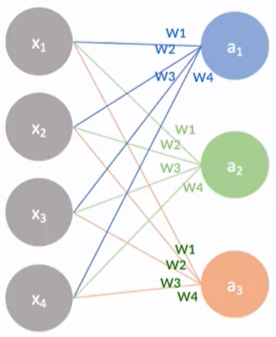

$$
\begin{bmatrix}
\text { w1,w2,w3,w4 } \\
\text { w1,w2,w3,w4 } \\
\text { w1,w2,w3,w4 }
\end{bmatrix}
\cdot
\begin{bmatrix}
x1 \\
x2\\
x3\\
x4
\end{bmatrix}
=
\left[\begin{array}{l}
w 1 x 1+w 2 x 2+w 3 x 3+w 4 x 4 \\
w 1 x 1+w 2 x 2+w 3 x 3+w 4 x 4 \\
w 1 x 1+w 2 x 2+w 3 x 3+w 4 x 4
\end{array}\right]
=
\begin{bmatrix}
a_1 \\
a_2\\
a_3
\end{bmatrix}
$$

Para nuestro ejemplo práctico usaremos 3 capas en la red, una de entrada, una oculta y una de salida, si queremos agregar más capas el procedimiento es examente el mismo, simplemente debemos copiar y pegar la estructura de la capa oculta para agregar más y más

###**Back propagation**

Consiste en como se distribuye el error en la red neuronal el cual se obtiene desde la función de pérdida. La idea es actualizar hasta encontrar el mínimo de la función de pérdida.

Para saber cuál es la capa en la que se deben actualizar los pesos evaluamos la red con el aprendizaje inverso, desde la última capa hasta la capa de entrada, distribuyendo el error de pérdida y el descenso del gradiente con derivadas parciales.

El error nace en la última capa, puedo calcular el error o las deltas de las derivadas parciales en la última capa usando regla de la cadena. En la última capa tengo Z, es decir, los resultados del producto punto en la última capa, los cuales dependerá de una función de activación. Veamos esto más claramente en la siguiente imagen: 

En la capa de salida los deltas tienen la forma de:
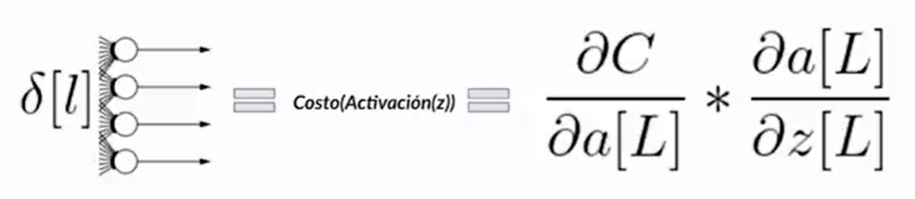

Siendo $\partial C$ el costo de activación en la última capa, $\partial a[L]$ la activación de la última capa y $\partial z[L]$ los datos de esa capa

En las capas ocultas los deltas se calculan de la siguiente manera:

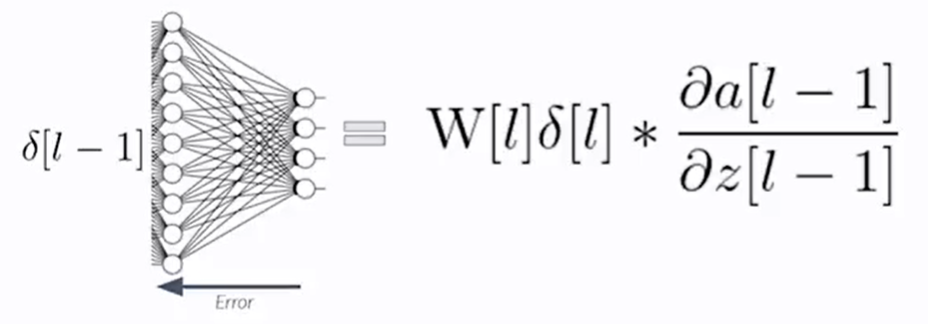

siendo $W[L]$ los pesos de la capa y $\delta [L]$ los deltas de la capa anterior

In [11]:
def train(X_data,lr,params,activation,training=True):

##################################
## FORWARD
##################################

    params['A0'] = X_data

    #CAPA DE ENTRADA

    #La operación de producto punto con params lo llamaremos Z
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    #Tenemos que pasar este valor por la función de activación porque no podemos apilar líneas entre si(Regresiones lineales) 
    #como lo vemos arriba. Para la función de activación usaremos A
    params['A1'] = activation[0](params['Z1'])

    #Repito para el resto de las capas
    #CAPA OCULTA
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = activation[1](params['Z2'])

    #CAPA DE SALIDA
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = activation[2](params['Z3'])
    #Para la última capa es mejor usar una función sigmoid si estamos hablando de un problema de clasificación, si estamos
    #en una regresión no se recomienda usar función de activación ya que si es el caso esta capa no me da como resultado 
    #clasificación, me dice un número continuo, por tanto, este número tiene una estructura lineal, como es lineal no 
    #necesito ponerle una capa de activación
  
    output = params['A3'] #activación de la última capa
    




    if training:
    ##################################
    # BACKPROPAGATION
    ##################################

        #Empezamos calculando los deltas de la ultima capa
        params['dZ3'] =  mse(Y,output,True) * activation[2](params['A3'],True) #derivada de la funcion de perdida por la derivada de la activacion
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3']) #delta de los pesos
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * activation[1](params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * activation[0](params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])






        ##################################
        ## GRADIENTE DESCENDENTE
        ##################################

        #Actualizo los pesos de la red neuronal   
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

# Ejemplo práctico

Una vez tenemos lista la estructura de la red neuronal lo único que quedaría faltando sería entrenar el modelo. Esto lo haremos usando un conjunto de datos que nosotros mismo crearemos y observaremos el comportamiento de la red en un problema de clasificación binario

##Creando el set de datos

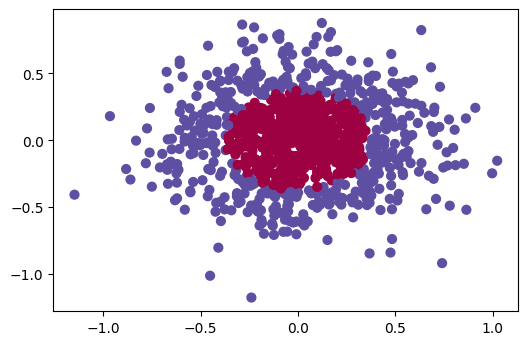

In [26]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.figure(dpi=100)
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

## Entrenando la red

In [18]:
activation = [relu,relu,sigmoid]

In [19]:
Topology =[2, 4, 8, 1] 
params = initialize_parameters_deep(Topology)
errors = []

#Entrenamiento por epoca
for _ in range(50000):
    output = train(X,0.001,params,activation)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.27574258276576213
0.255355937881985
0.25081942051536016
0.2494212227703108
0.24878822818500823
0.24832535078757823
0.24787349795459443
0.24740042887293098
0.24688652751253964
0.2463181379589256
0.24571849961491732
0.24509359449224555
0.2444248131009761
0.24368314642623237
0.2428682468192264
0.24196535400620048
0.24097333340088098
0.2398618471367397
0.2385864196348841
0.2370899465284574
0.2352762421377194
0.2330022873801213
0.23003314504804762
0.22603191226938932
0.22066242489431406
0.21372220564090008
0.20561811529382965
0.19716744746265477
0.18890355633221514
0.18141752781538178
0.17510872679280737
0.16979509979270796
0.1654544492936273
0.16126764474202251
0.15638763903341918
0.1496031573461744
0.1393608943643438
0.1258854964114843
0.10864147618395574
0.09149913041049623
0.07827019279335369
0.06953940840371743
0.064930514570088
0.06202149984885839
0.059987612793806835
0.05850919334374509
0.05739041775022601
0.05652335051005512
0.055852735832212536
0.055328853410220216
0.054913928940

Como podemos ver la función de coste decrece eficientemente, veamoslo de manera gráfica

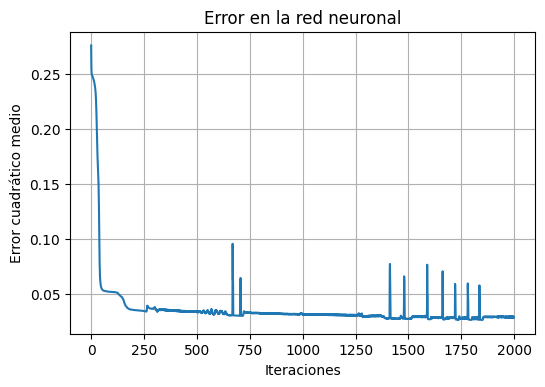

In [22]:
plt.figure(dpi=100)
plt.plot(errors)
plt.title("Error en la red neuronal")
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático medio")
plt.grid()

## Data de prueba

In [23]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,activation,training=False) 
#training=False porque no queremos que el modelo entrene sino que haga predicciones

In [24]:
y = np.where(y >= 0.5, 1, 0)

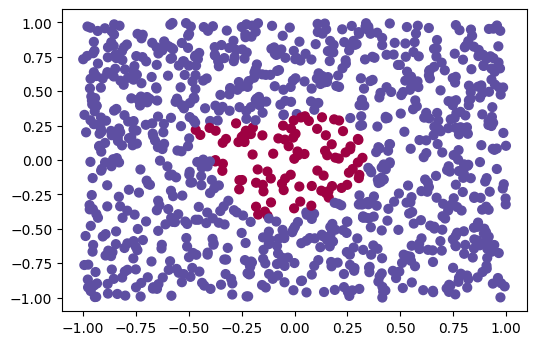

In [27]:
plt.figure(dpi=100)
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

Como se puede observar el modelo predice bastante bien el comportamiento de los datos haciendo una clasificación acertiva

## Malla de visualización

In [ ]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [ ]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

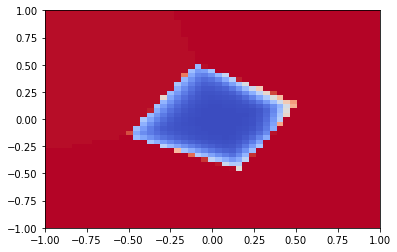

In [ ]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')